In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import math
import statistics
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dic = pickle.load( open( "../JET_OUT/jettrack_1D.p", "rb" ) )

In [3]:
def is_winter(month):
    return (month == 4) | (month == 5) | (month == 6) | (month == 7) | (month == 8) | (month == 9)

In [4]:
ind_list = [2015,2016,2017]

In [5]:
label = {'lat':'Latitude',
'width':'Width',
'ua':'Velocity',
'top':'Northern Extent',
'bottom':'Southern Extent'}

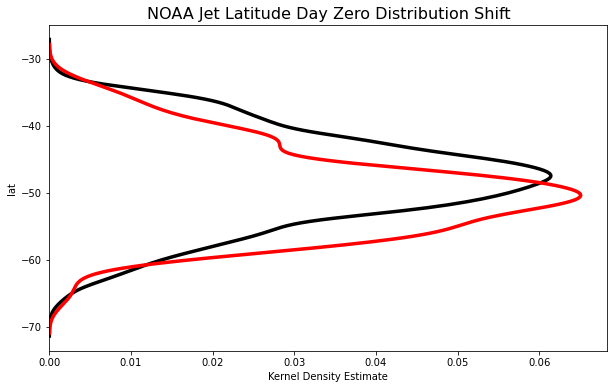

In [6]:
for metric in ['lat']: #,'width','ua','top','bottom']:
    winter = pd.to_numeric(dic['ERA5'].where(is_winter(dic['ERA5'].months)).dropna().set_index('years')[metric])
    D0 = winter.loc[ind_list]
    fig, ax1 = plt.subplots(figsize=(10,6))
    sns.kdeplot(y = list(winter),lw=3.5,color='black', label='Winter Climatology',ax=ax1)
    sns.kdeplot(y = list(D0),lw=3.5,color='red', label='Day Zero',ax=ax1)
    ax1.set_xlabel("Kernel Density Estimate")
    ax1.set_ylabel(str(metric))
    plt.title('NOAA Jet '+label[metric]+' Day Zero Distribution Shift', fontsize=16, ha='center')
    plt.savefig('../JET_OUT/Day_Zero_1D/png/'+str(metric)+'_shift.png',dpi=100)
    plt.savefig('../JET_OUT/Day_Zero_1D/pdf/'+str(metric)+'_shift.pdf')
    plt.savefig('../JET_OUT/Day_Zero_1D/svg/'+str(metric)+'_shift.svg',format='svg', dpi=1200)
    #plt.close()
    plt.show()

In [7]:
winter = pd.to_numeric(dic['ERA5'].where(is_winter(dic['ERA5'].months)).dropna().set_index('years')['ua'])
D0 = winter.loc[ind_list]
winter = winter.groupby(level='years').mean()
D0 = D0.groupby(level='years').mean()

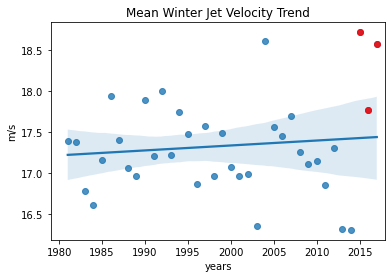

In [8]:
ax = sns.regplot(x=winter.index, y=winter.values, data=winter)
sns.regplot(x = D0.index,y=D0.values,data=D0,fit_reg=False,color='red')
ax.set(xlim=(1979, 2018))
plt.title("Mean Winter Jet Velocity Trend")
plt.ylabel("m/s")
plt.savefig('../JET_OUT/Day_Zero_1D/png/ua_trend.png',dpi=100)
plt.savefig('../JET_OUT/Day_Zero_1D/pdf/ua_trend.pdf')
plt.savefig('../JET_OUT/Day_Zero_1D/svg/ua_trend.svg',format='svg', dpi=1200)
plt.show()

In [9]:
winter = pd.to_numeric(dic['ERA5'].where(is_winter(dic['ERA5'].months)).dropna().set_index('years')['lat'])
D0 = winter.loc[ind_list]
winter = winter.groupby(level='years').mean()
D0 = D0.groupby(level='years').mean()

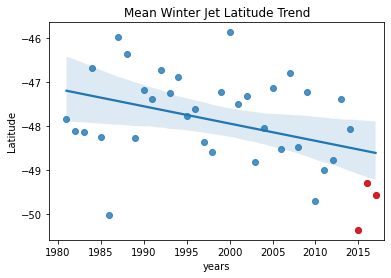

In [10]:
ax = sns.regplot(x=winter.index, y=winter.values, data=winter)
sns.regplot(x = D0.index,y=D0.values,data=D0,fit_reg=False,color='red')
ax.set(xlim=(1979, 2018))
plt.title("Mean Winter Jet Latitude Trend")
plt.ylabel("Latitude")
plt.savefig('../JET_OUT/Day_Zero_1D/png/lat_trend.png',dpi=100)
plt.savefig('../JET_OUT/Day_Zero_1D/pdf/lat_trend.pdf')
plt.savefig('../JET_OUT/Day_Zero_1D/svg/lat_trend.svg',format='svg', dpi=1200)
plt.show()

In [11]:
winter = pd.to_numeric(dic['ERA5'].where(is_winter(dic['ERA5'].months)).dropna().set_index('years')['width'])
D0 = winter.loc[ind_list]
winter = winter.groupby(level='years').mean()
D0 = D0.groupby(level='years').mean()

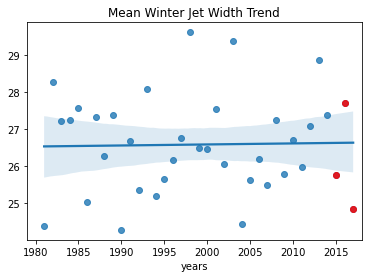

In [12]:
ax = sns.regplot(x=winter.index, y=winter.values, data=winter)
sns.regplot(x = D0.index,y=D0.values,data=D0,fit_reg=False,color='red')
ax.set(xlim=(1979, 2018))
plt.title("Mean Winter Jet Width Trend")
plt.ylabel("")
plt.savefig('../JET_OUT/Day_Zero_1D/png/fwhm_trend.png',dpi=100)
plt.savefig('../JET_OUT/Day_Zero_1D/pdf/fwhm_trend.pdf')
plt.savefig('../JET_OUT/Day_Zero_1D/svg/fwhm_trend.svg',format='svg', dpi=1200)
plt.show()